# New York State Rₜ
> Daily updates on NYS Rₜ.

- badges: true
- comments: true
- categories: [jupyter]
- permalink: /daily/

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastpapers

In [2]:
#hide
from babino2020masks.core import *
from babino2020masks.lasso import *

In [3]:
#hide
ny = API(api_settings['NYS'][:2], **api_settings['NYS'][2])
df = ny.get_all_data_statewide()

/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/babino2020masks/core.py:78: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  df = df.groupby('date').sum()


/opt/hostedtoolcache/Python/3.8.12/x64/lib/python3.8/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


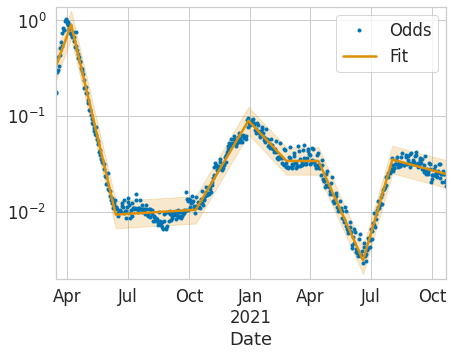

In [4]:
#hide_input
lics = LassoICSelector(df['Odds'], 'bic')
lics.fit_best_alpha()
df['Fit'], df['Odds_l'], df['Odds_u'] = lics.odds_hat_l_u()
ax = plot_data_and_fit(df, 'Date', 'Odds', 'Fit', 'Odds_l', 'Odds_u', figsize=(7, 5))

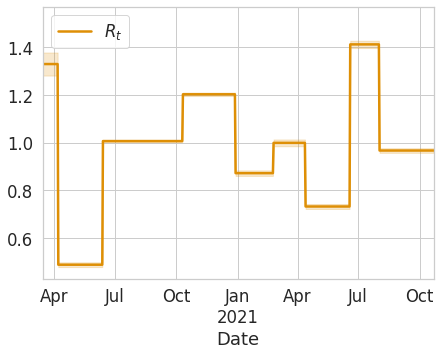

In [5]:
#hide_input
df['$R_t$'], df['Rl'], df['Ru'] = lics.rt()
ax = plot_data_and_fit(df, 'Date', None, '$R_t$', 'Rl', 'Ru', figsize=(7, 5), logy=False, palette=[colorblind[1],colorblind[1]])

In [6]:
#hide_input
print(f'Rₜ on {df.Date.iloc[-1]:%B %d %Y}: {df["$R_t$"].iloc[-1]:2.3} ({df["Rl"].iloc[-1]:2.3}-{df["Ru"].iloc[-1]:2.3} 95% C.I)')

Rₜ on October 22 2021: 0.968 (0.958-0.977 95% C.I)


In [7]:
#hide_input
from datetime import datetime
print(f'Last updated on {datetime.today():%m/%d/%Y %H:%M:%S}')

Last updated on 10/24/2021 21:38:01


* [Source code](https://github.com/ababino/babino2020masks)
* [Preprint](https://arxiv.org/abs/2006.05532)